### Dimension Reduction

In [ ]:
For this tutorial, I have chosen to use data on corruption perception index of all countries in the world. Higher values indicates
less corruption. The data source used was gotten from [https://www.gapminder.org/data/]

In [ ]:
Dimension reduction is used to when dealing with a large dataset that contains thousands of features. Dimension reduction reduces
the number of features in your dataset without having to lose much information and keep (or improve) the model’s performance.
It is a really powerful way to deal with huge datasets, 

In [ ]:
Step 1- Read data from csv file as a dataframe

In [1]:
corruption_file = 'corruption_perception_index_cpi.csv'

In [15]:
import pandas as pd
import numpy as np
    
existing_df = pd.read_csv(
    corruption_file, 
    index_col = 0, 
    thousands  = ',')
existing_df.index.names = ['country']
existing_df.columns.names = ['year']

In [16]:
existing_df.head()

year,2012,2013,2014,2015,2016,2017
country,,,,,,
Afghanistan,8.0,8.0,12.0,11.0,15.0,15
Albania,33.0,31.0,33.0,36.0,39.0,38
Algeria,34.0,36.0,36.0,36.0,34.0,33
Angola,22.0,23.0,19.0,15.0,18.0,19
Argentina,35.0,34.0,34.0,32.0,36.0,39


In [ ]:
Dimension reduction with PCA
In this section each country is represented in a two dimensional space. Each country is defined by 5 variables. Each variable 
represents the score for each country on how corrupt their public sectors is perceived to be for given years 2012-2017.
By using PCA we will be able to reduce these 5 variables to just the two of them that best captures that information.

In [ ]:
Step 2 - Before, clean dataset to remove empty/NAN values

In [17]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
Step 3- Specify number of prinicpal components to use.Then we can just call the fit() method with our data frame and check the 
results.

In [22]:
from sklearn.decomposition import PCA
    
pca = PCA(n_components=2)
clean_dataset(existing_df)
pca.fit(existing_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
PCA(copy=True, n_components=2, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
This gives us an object we can use to transform our data by calling transform.

In [24]:
existing_2d = pca.transform(existing_df)

In [ ]:
We end up with a lower dimension representation of our data as seen below:

In [25]:
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = existing_df.index
existing_df_2d.columns = ['PC1','PC2']
existing_df_2d.head()

,PC1,PC2
country,,
Afghanistan,-75.243390,5.650414
Albania,-17.679005,5.972040
Algeria,-17.994387,-2.096432
Angola,-56.047637,-4.048110
Argentina,-17.726857,2.996787


In [26]:
print(pca.explained_variance_ratio_) 

[0.98857026 0.00743006]


In [ ]:
The first PC shows 98% of the variance, while the second shows 0.7% for a total of 98.7% between them.

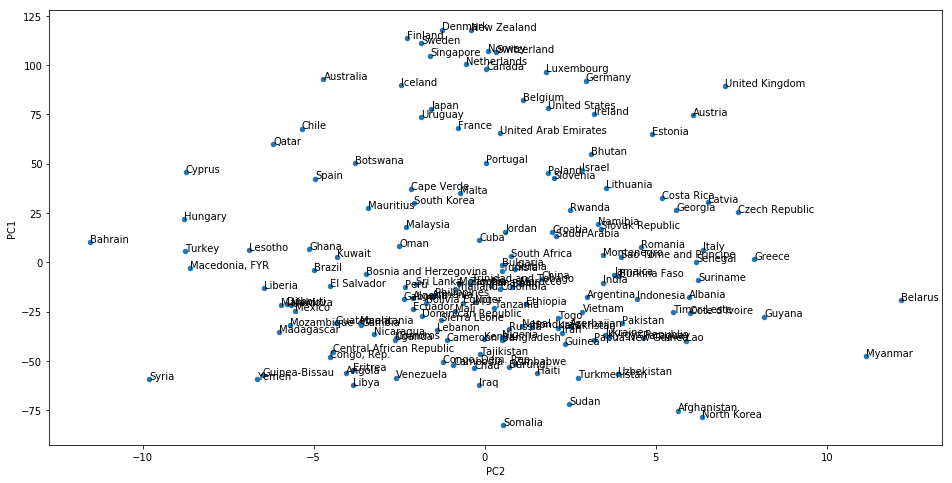

In [27]:
%matplotlib inline
    
ax = existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))
    
for i, country in enumerate(existing_df.index):
    ax.annotate(
        country, 
        (existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1)
    )

In [ ]:
Step 5 -- Create a bubble chart, by setting the point size to a value proportional to the mean value for all the years in
that particular country. But first we add a new column containing the re-scaled mean per country across all the years.

In [29]:
from sklearn.preprocessing import normalize
    
existing_df_2d['country_mean'] = pd.Series(existing_df.mean(axis=1), index=existing_df_2d.index)
country_mean_max = existing_df_2d['country_mean'].max()
country_mean_min = existing_df_2d['country_mean'].min()
country_mean_scaled = (existing_df_2d.country_mean-country_mean_min) / country_mean_max
existing_df_2d['country_mean_scaled'] = pd.Series(
        country_mean_scaled, 
        index=existing_df_2d.index) 
existing_df_2d.head()

,PC1,PC2,country_mean,country_mean_scaled
country,,,,
Afghanistan,-75.243390,5.650414,11.500000,0.033210
Albania,-17.679005,5.972040,35.000000,0.293358
Algeria,-17.994387,-2.096432,34.833333,0.291513
Angola,-56.047637,-4.048110,19.333333,0.119926
Argentina,-17.726857,2.996787,35.000000,0.293358


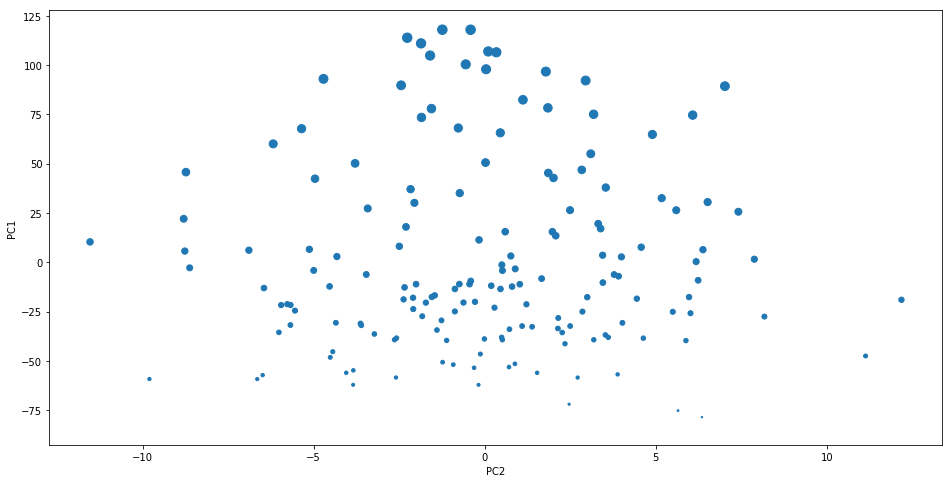

In [30]:
existing_df_2d.plot(
    kind='scatter', 
    x='PC2', 
    y='PC1', 
    s=existing_df_2d['country_mean_scaled']*100, 
    figsize=(16,8))

In [ ]:
Step 6- Repeat the same chart for the sum values

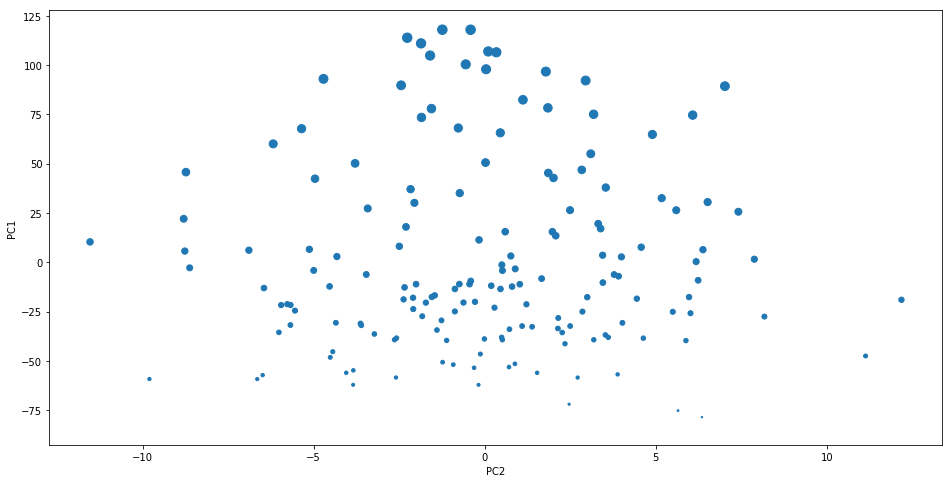

In [32]:
existing_df_2d['country_sum'] = pd.Series(
    existing_df.sum(axis=1), 
    index=existing_df_2d.index)
country_sum_max = existing_df_2d['country_sum'].max()
country_sum_min = existing_df_2d['country_sum'].min()
country_sum_scaled =(existing_df_2d.country_sum-country_sum_min) / country_sum_max
existing_df_2d['country_sum_scaled'] = pd.Series(
        country_sum_scaled, 
        index=existing_df_2d.index)
existing_df_2d.plot(
    kind='scatter', 
    x='PC2', y='PC1', 
    s=existing_df_2d['country_sum_scaled']*100, 
    figsize=(16,8))

In [ ]:
Step 7 -Explore changes between the years

In [34]:
existing_df_2d['country_change'] = pd.Series(
    existing_df['2017']-existing_df['2012'], 
    index=existing_df_2d.index)
country_change_max = existing_df_2d['country_change'].max()
country_change_min = existing_df_2d['country_change'].min()
country_change_scaled = (existing_df_2d.country_change - country_change_min) / country_change_max
existing_df_2d['country_change_scaled'] = pd.Series(
        country_change_scaled, 
        index=existing_df_2d.index)
existing_df_2d[['country_change','country_change_scaled']].head()

,country_change,country_change_scaled
country,,
Afghanistan,7.0,1.466667
Albania,5.0,1.333333
Algeria,-1.0,0.933333
Angola,-3.0,0.800000
Argentina,4.0,1.266667


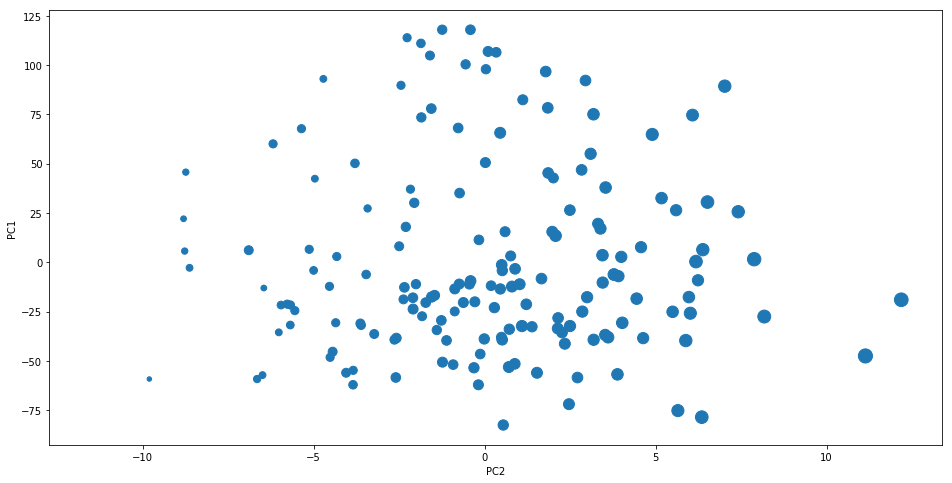

In [35]:
existing_df_2d.plot(
    kind='scatter', 
    x='PC2', y='PC1', 
    s=existing_df_2d['country_change_scaled']*100, 
    figsize=(16,8))

In [ ]:
Conclusion:
    The plots show that most of the variation occurs on the y-axis and we saw important concentrations of countries.
    While we descend that axis, the number of countries is more sparse, and they belong to less developed regions of the world.

In [ ]:
Work cited:
    https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/ 
    https://www.codementor.io/jadianes/data-science-python-pandas-r-dimensionality-reduction-du1081aka
    https://www.gapminder.org/data/
    